# <center><font color='MediumSeaGreen'>Estimando curvas normales</font><center>
## <center><b> Bárbara Pérez </b><center>


_________

## <font color='MediumSeaGreen'>Descripción</font>

La empresa en la cual usted trabaja quedó muy satisfecha con su análisis anterior del Índice
de Desarrollo Humano (IDH) de diversos países, el cual se elaboró para el Ministerio de
Relaciones Exteriores a fin de poder contar con la data necesaria para poder comenzar a
trabajar en relaciones diplomáticas más estrechas con diversos países. Por consiguiente,
esta vez le solicitan que, a partir del trabajo hecho en el Desafío precedente, usted pueda
seguir profundizando en la base de datos Quality of Government, de la Universidad de
Gotemburgo

_______

## <font color='MediumSeaGreen'>Requerimientos</font>

A continuación, revisaremos los requerimientos y acciones que el Ministerio de RREE te pide
realizar.

<b><font color='MediumSeaGreen'>1.</font> Importar un csv (2 puntos):</b> Importe el set de datos creados por usted al final de la sesión pasada.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('subsample_bpr_demo.csv')

In [3]:
df.head()

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,164,0.488,SDN,SubSaharian,NaN,NaN,NaN,NaN,NaN,8.428775
1,186,0.918,USA,WesternDem,47769.6990,318.789001,6.000000,8.82,18.100000,17.140755
2,44,0.773,CUB,LatAm,5899.9399,NaN,NaN,4.37,36.099998,11.058801
3,124,0.642,NIC,LatAm,2527.1001,5.946000,20.600000,3.55,NaN,9.040139
4,118,0.637,NAM,SubSaharian,4521.2900,NaN,28.299999,7.84,23.799999,8.928688


____________

<b><font color='MediumSeaGreen'>2.</font> Importar su conjunto de funciones (2 puntos).</b>  Para ello deberás:

- Generar un archivo <span style='background:gainsboro'><font color='dimgray'>ancilliary_funcs.py</font></span> para guardar las funciones creadas en la sesión pasada e importe.

- Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos
de la muestra importada.

In [4]:
from ancilliary_funcs import observaciones_perdidas

In [5]:
#Inspeccionar cantidad de casos perdidos de muestra importada

In [6]:
observaciones_perdidas(df, 'undp_hdi')

{'casos perdidos': 4, 'porcentaje': 0.041237113402061855}

In [7]:
observaciones_perdidas(df, 'gle_cgdpc')

{'casos perdidos': 2, 'porcentaje': 0.020618556701030927}

In [8]:
observaciones_perdidas(df, 'imf_pop')


{'casos perdidos': 32, 'porcentaje': 0.32989690721649484}

In [9]:
observaciones_perdidas(df, 'wef_imort')

{'casos perdidos': 25, 'porcentaje': 0.25773195876288657}

In [10]:
observaciones_perdidas(df, 'who_alc2000')

{'casos perdidos': 9, 'porcentaje': 0.09278350515463918}

In [11]:
observaciones_perdidas(df, 'who_tobt')

{'casos perdidos': 36, 'porcentaje': 0.3711340206185567}

In [12]:
observaciones_perdidas(df, 'wdi_exph')

{'casos perdidos': 2, 'porcentaje': 0.020618556701030927}

__________

<b><font color='MediumSeaGreen'>3.</font> Estimar el puntaje Z de una variable (2 puntos):</b>  Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea)

- Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: 𝑧𝑖 = ( 𝑥𝑖 − 𝑥 ) / σ (𝑥).

- Para ordenar los valores pueden utilizar la función <span style='background:gainsboro'><font color='dimgray'>sort_values</font></span> del <span style='background:gainsboro'><font color='dimgray'>DataFrame</font></span> analizado. Lean la documentación asociada al argumento <span style='background:gainsboro'><font color='dimgray'>by</font></span>.

- Asegúrense de eliminar las observaciones que tengan valores perdidos con <span style='background:gainsboro'><font color='dimgray'>dropna</font>.Lean la documentación asociada al argumento <span style='background:gainsboro'><font color='dimgray'>subset</font>.

- Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?.

In [13]:
for i in ['gle_cgdpc','wdi_exph']:
    get_mean = df[i].mean()
    get_std = df[i].std()
    df['zscore_'+i] = (df[i]-get_mean) / get_std

In [14]:
#Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable.

df.head() 

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,zscore_gle_cgdpc,zscore_wdi_exph
0,164,0.488,SDN,SubSaharian,NaN,NaN,NaN,NaN,NaN,8.428775,NaN,0.530632
1,186,0.918,USA,WesternDem,47769.6990,318.789001,6.000000,8.82,18.100000,17.140755,1.816850,3.680344
2,44,0.773,CUB,LatAm,5899.9399,NaN,NaN,4.37,36.099998,11.058801,-0.449870,1.481486
3,124,0.642,NIC,LatAm,2527.1001,5.946000,20.600000,3.55,NaN,9.040139,-0.632467,0.751663
4,118,0.637,NAM,SubSaharian,4521.2900,NaN,28.299999,7.84,23.799999,8.928688,-0.524507,0.711369


In [15]:
df_orden_gle_cgdpc = df.dropna(subset=['gle_cgdpc','wdi_exph']).sort_values(by='gle_cgdpc')
df_orden_wdi_exph = df.dropna(subset=['gle_cgdpc','wdi_exph']).sort_values(by='wdi_exph')

In [16]:
df_orden_gle_cgdpc.head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,zscore_gle_cgdpc,zscore_wdi_exph
29,41,0.425,COD,SubSaharian,324.16000,NaN,74.500000,1.82,NaN,4.328234,-0.751728,-0.951870
60,52,0.678,SLV,LatAm,332.26999,NaN,13.600000,2.52,NaN,6.772403,-0.751289,-0.068210
59,125,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.734384,-0.412070
82,26,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.16,NaN,7.535565,-0.733354,0.207703
38,32,0.347,CAF,SubSaharian,690.03998,NaN,NaN,1.66,NaN,4.200222,-0.731921,-0.998151
67,102,0.511,MDG,SubSaharian,822.62000,NaN,40.900002,0.87,NaN,3.041355,-0.724743,-1.417125
37,116,0.414,MOZ,SubSaharian,852.39001,25.733,63.099998,1.16,18.799999,6.975582,-0.723131,0.005247
75,103,0.473,MWI,SubSaharian,938.34998,17.604,46.000000,1.23,16.299999,11.377956,-0.718478,1.596873
16,139,0.421,GNB,SubSaharian,961.26001,NaN,NaN,3.57,NaN,5.593137,-0.717238,-0.494559
55,39,0.498,COM,SubSaharian,972.35999,0.776,NaN,0.12,15.300000,6.747643,-0.716637,-0.077161


In [17]:
df_orden_gle_cgdpc.tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,zscore_gle_cgdpc,zscore_wdi_exph
78,90,0.899,KOR,EastAsia,33181.891,50.747002,3.3,9.33,27.400000,7.373113,1.027104,0.148970
51,15,0.895,BEL,WesternDem,33764.711,11.181000,3.4,12.60,23.900000,10.594751,1.058657,1.313715
93,59,0.894,FRA,WesternDem,34007.898,64.028000,3.4,11.50,28.100000,11.539519,1.071822,1.655284
23,64,0.924,DEU,WesternDem,39486.699,80.983002,3.4,11.03,30.700001,11.297001,1.368430,1.567605
19,121,0.923,NLD,WesternDem,42258.352,16.865000,3.4,8.68,25.700001,10.897293,1.518480,1.423095
90,148,NaN,SMR,WesternDem,42664.211,0.034000,NaN,NaN,NaN,6.129065,1.540453,-0.300801
48,80,0.920,IRL,WesternDem,46422.070,4.621000,3.4,10.75,23.200001,7.783196,1.743893,0.297231
1,186,0.918,USA,WesternDem,47769.699,318.789001,6.0,8.82,18.100000,17.140755,1.816850,3.680344
45,127,0.948,NOR,WesternDem,57634.770,5.156000,2.2,6.06,24.100000,9.719718,2.350920,0.997357
35,111,NaN,MCO,WesternDem,108481.130,NaN,NaN,NaN,NaN,4.337683,5.103611,-0.948453


- **¿Qué características en común se encuentran?.**

Las caracteristicas en común, tanto en las primeras lineas y las ultimas 10, se ordenan el puntaje Z por region. 

_________

<b><font color='MediumSeaGreen'>4.</font> Estimar el puntaje z de las regiones (2 puntos).</b> Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).

- Para ello realice un <span style='background:gainsboro'><font color='dimgray'>dotplot</font></span> que muestre el valor promedio de su variable por cada región.

- Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).

In [18]:
from ancilliary_funcs import grafica_dotplot_v2

<Figure size 864x576 with 0 Axes>

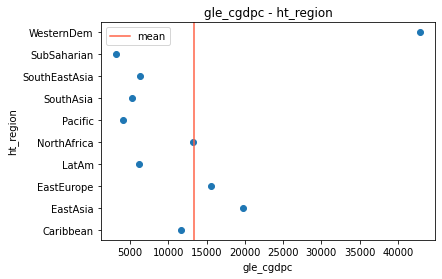

<Figure size 864x576 with 0 Axes>

In [19]:
grafica_dotplot_v2(df_orden_gle_cgdpc, 'gle_cgdpc', 'ht_region', statistic='mean')
plt.figure(figsize=(12,8))

_____

<b><font color='MediumSeaGreen'>5.</font> Generar curvas de Densidad de Probabilidad (2 puntos).</b> 

- Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables <span style='background:gainsboro'><font color='dimgray'>imf_pop</font></span>, <span style='background:gainsboro'><font color='dimgray'>gle_cgdpc</font></span> y <span style='background:gainsboro'><font color='dimgray'>wdi_exph</font></span>.

- La función debe contener como argumentos:
    - <span style='background:gainsboro'><font color='dimgray'>df</font></span>: Tabla de datos 1
    - <span style='background:gainsboro'><font color='dimgray'>variable</font></span>: Variable a contrastar.

In [20]:
def graf_compara(df1, df2, variable, log=False):
    titulo = "Gráfico de densidad de "+variable
    df1_dropna = df1[variable].dropna()
    df2_dropna = df2[variable].dropna()
    len_df1 = len(df1_dropna)
    len_df2 = len(df2_dropna)
    if log:
        df1_dropna = np.log(df1_dropna)
        df2_dropna = np.log(df2_dropna)
        titulo += " con "
    else:
        titulo += " sin "
    titulo += "Transformación logarítmica"
    
    x_axis_df1 = np.linspace(df1_dropna.min(), df1_dropna.max(), len_df1)
    plt.figure(figsize=(10,6))
    
    plt.plot(x_axis_df1, stats.norm.pdf(x_axis_df1, df1_dropna.mean(), df1_dropna.std()), color = 'Blue',
        label=f" densidad{variable} en df1")     
    plt.axvline(df1_dropna.mean(), color ='Blue', linestyle='--', lw=3, label=f"mean {variable} en df1")
    
    x_axis_df2 = np.linspace(df2_dropna.min(), df2_dropna.max(), len_df2)
    plt.plot(x_axis_df2, stats.norm.pdf(x_axis_df2, df2_dropna.mean(), df2_dropna.std()), color = 'Orange',
        label=f" densidad{variable} en df2")     
    plt.axvline(df2_dropna.mean(), color ='Orange', linestyle='--', lw=3, label=f"mean {variable} en df2")
    
    plt.title(titulo)
    plt.legend()


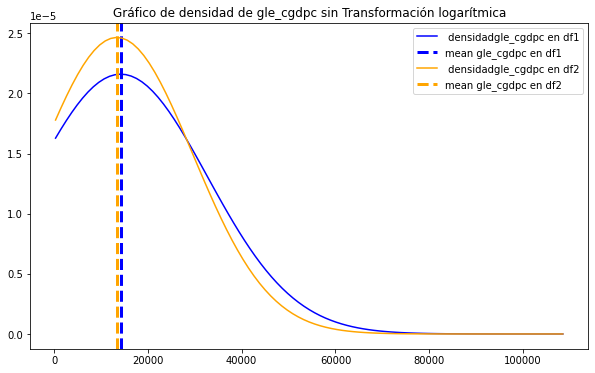

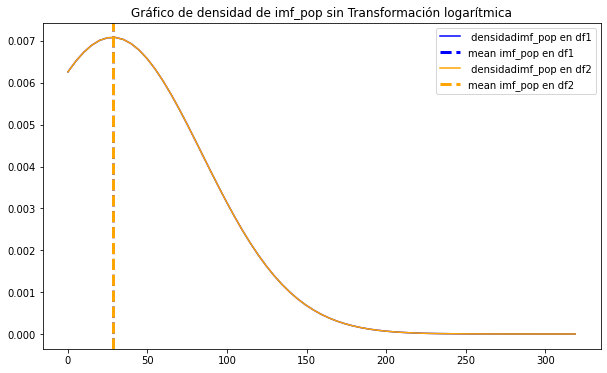

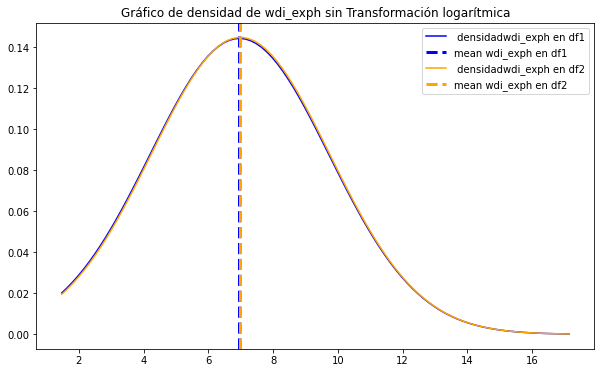

In [21]:
graf_compara(df, df_orden_gle_cgdpc, 'gle_cgdpc', log=False)
graf_compara(df, df_orden_gle_cgdpc, 'imf_pop', log=False)
graf_compara(df, df_orden_gle_cgdpc, 'wdi_exph', log=False)

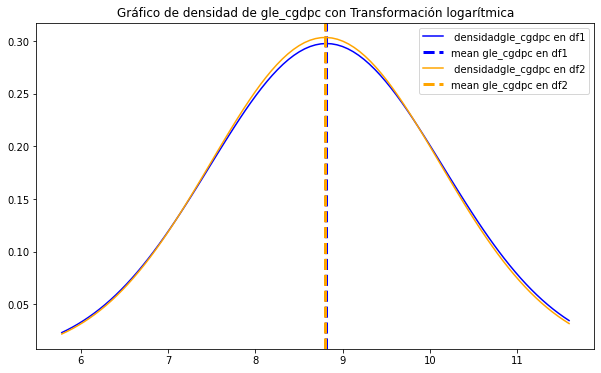

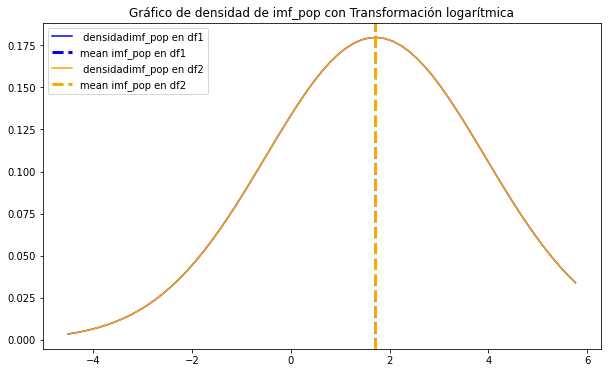

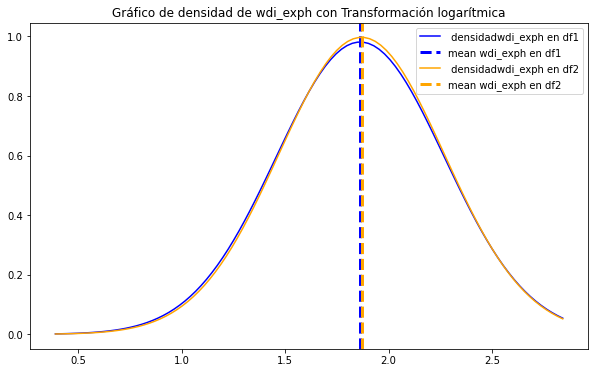

In [22]:
graf_compara(df, df_orden_gle_cgdpc, 'gle_cgdpc', log=True)
graf_compara(df, df_orden_gle_cgdpc, 'imf_pop', log=True)
graf_compara(df, df_orden_gle_cgdpc, 'wdi_exph', log=True)

______